# Import liabraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

C:\Users\admin\AppData\Local\Temp\ipykernel_7404\2218255523.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# Load Dataframe

In [2]:
df = pd.read_csv(r"C:\Users\admin\Desktop\next hike\project-5\clustered_data.csv")

C:\Users\admin\AppData\Local\Temp\ipykernel_7404\4096522416.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"C:\Users\admin\Desktop\next hike\project-5\clustered_data.csv")


In [3]:
df

,Unnamed: 0.1,Unnamed: 0,Bearer Id,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),...,Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),Duration (s),Total Traffic (Bytes),Total Session Duration (s),Cluster,Engagement Cluster
0,0,0,13114483460844900352,0.770771,0.662663,0.000981,0.414307,Samsung Galaxy A5 Sm-A520F,0.355933,0.000433,...,0.866255,0.203620,0.532304,0.448991,0.336846,9.807342e-07,3732.549575,0.000245,1,2
1,1,1,13114483482878900224,0.235235,0.606607,0.000733,0.414353,Samsung Galaxy J5 (Sm-J530),0.358701,0.000671,...,0.070697,0.624705,0.909191,0.674934,0.721401,7.331640e-07,3696.557910,0.000323,0,0
2,2,2,13114483484080500736,0.001001,0.652653,0.000731,0.414194,Samsung Galaxy A8 (2018),0.353501,0.001115,...,0.023889,0.486922,0.254587,0.331504,0.304394,7.313597e-07,2610.365711,0.000190,1,2
3,3,3,13114483485442799616,0.486486,0.171171,0.000710,0.414303,undefined,0.354263,0.001115,...,0.655223,0.888074,0.772836,0.536111,0.936439,7.096271e-07,9097.031894,0.000582,2,0
4,4,4,13114483499480700928,0.565566,0.954955,0.000584,0.414303,Samsung Sm-G390F,0.354774,0.001115,...,0.213165,0.652929,0.840054,0.472752,0.627361,5.841003e-07,570.500780,0.000047,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149424,149424,149995,13042425979329300480,0.615616,0.407407,0.000028,0.414303,undefined,0.354019,0.003229,...,0.768458,0.381035,0.899247,0.674205,0.906287,2.831507e-08,9097.031894,0.000582,0,0
149425,149425,149996,7277825670196679680,0.451451,0.214214,0.000040,0.414382,Apple iPhone 8 Plus (A1897),0.355547,0.000330,...,0.555426,0.003867,0.814514,0.725666,0.632983,4.000013e-08,3029.267320,0.000160,0,2
149426,149426,149997,7349883264234609664,0.483483,0.187187,0.000049,0.414353,Apple iPhone Se (A1723),0.357346,0.000279,...,0.285950,0.844373,0.148418,0.480600,0.736207,4.903806e-08,5189.439500,0.000272,2,0
149427,149427,149998,13114483573367300096,0.283283,0.810811,0.000049,0.414333,Apple iPhone Xs (A2097),0.357962,0.000444,...,0.808894,0.143576,0.683303,0.424642,0.653758,4.918869e-08,1324.904830,0.000069,2,2


# Task 3 - Experience Analytics

In [4]:
# Display the first few rows of the dataset
(df.head())


,Unnamed: 0.1,Unnamed: 0,Bearer Id,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),...,Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),Duration (s),Total Traffic (Bytes),Total Session Duration (s),Cluster,Engagement Cluster
0,0,0,13114483460844900352,0.770771,0.662663,0.000981,0.414307,Samsung Galaxy A5 Sm-A520F,0.355933,0.000433,...,0.866255,0.203620,0.532304,0.448991,0.336846,9.807342e-07,3732.549575,0.000245,1,2
1,1,1,13114483482878900224,0.235235,0.606607,0.000733,0.414353,Samsung Galaxy J5 (Sm-J530),0.358701,0.000671,...,0.070697,0.624705,0.909191,0.674934,0.721401,7.331640e-07,3696.557910,0.000323,0,0
2,2,2,13114483484080500736,0.001001,0.652653,0.000731,0.414194,Samsung Galaxy A8 (2018),0.353501,0.001115,...,0.023889,0.486922,0.254587,0.331504,0.304394,7.313597e-07,2610.365711,0.000190,1,2
3,3,3,13114483485442799616,0.486486,0.171171,0.000710,0.414303,undefined,0.354263,0.001115,...,0.655223,0.888074,0.772836,0.536111,0.936439,7.096271e-07,9097.031894,0.000582,2,0
4,4,4,13114483499480700928,0.565566,0.954955,0.000584,0.414303,Samsung Sm-G390F,0.354774,0.001115,...,0.213165,0.652929,0.840054,0.472752,0.627361,5.841003e-07,570.500780,0.000047,2,2


In [5]:
df.isnull().sum()

Unnamed: 0.1                          0
Unnamed: 0                            0
Bearer Id                             0
Start ms                              0
End ms                                0
Dur. (ms)                             0
IMSI                                  0
MSISDN/Number                         0
IMEI                                  0
Avg RTT DL (ms)                       0
Avg RTT UL (ms)                   27675
Avg Bearer TP DL (kbps)               0
Avg Bearer TP UL (kbps)               0
TCP DL Retrans. Vol (Bytes)           0
TCP UL Retrans. Vol (Bytes)       96432
DL TP < 50 Kbps (%)                   0
50 Kbps < DL TP < 250 Kbps (%)      724
250 Kbps < DL TP < 1 Mbps (%)       724
DL TP > 1 Mbps (%)                  724
UL TP < 10 Kbps (%)                 770
10 Kbps < UL TP < 50 Kbps (%)       770
50 Kbps < UL TP < 300 Kbps (%)      770
UL TP > 300 Kbps (%)                  0
Activity Duration DL (ms)             0
Activity Duration UL (ms)             0


In [6]:
df.dtypes

Unnamed: 0.1                        int64
Unnamed: 0                          int64
Bearer Id                          object
Start ms                          float64
End ms                            float64
Dur. (ms)                         float64
IMSI                              float64
MSISDN/Number                      object
IMEI                              float64
Avg RTT DL (ms)                   float64
Avg RTT UL (ms)                   float64
Avg Bearer TP DL (kbps)           float64
Avg Bearer TP UL (kbps)           float64
TCP DL Retrans. Vol (Bytes)       float64
TCP UL Retrans. Vol (Bytes)       float64
DL TP < 50 Kbps (%)               float64
50 Kbps < DL TP < 250 Kbps (%)    float64
250 Kbps < DL TP < 1 Mbps (%)     float64
DL TP > 1 Mbps (%)                float64
UL TP < 10 Kbps (%)               float64
10 Kbps < UL TP < 50 Kbps (%)     float64
50 Kbps < UL TP < 300 Kbps (%)    float64
UL TP > 300 Kbps (%)              float64
Activity Duration DL (ms)         

# Preprocess the Data

In [7]:
# Assuming 'MSISDN/Number' is a column with non-numeric values, convert it to numeric
df['MSISDN/Number'] = pd.to_numeric(df['MSISDN/Number'], errors='coerce')
df['MSISDN/Number']

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
          ..
149424   NaN
149425   NaN
149426   NaN
149427   NaN
149428   NaN
Name: MSISDN/Number, Length: 149429, dtype: float64

In [8]:
df['Bearer Id'] = pd.to_numeric(df['Bearer Id'], errors='coerce')
df['Bearer Id']

0         1.311448e+19
1         1.311448e+19
2         1.311448e+19
3         1.311448e+19
4         1.311448e+19
              ...     
149424    1.304243e+19
149425    7.277826e+18
149426    7.349883e+18
149427    1.311448e+19
149428    1.311448e+19
Name: Bearer Id, Length: 149429, dtype: float64

In [9]:
# Replace missing values with a suitable method (e.g., mean, median) for numeric columns
numeric_columns = df.select_dtypes(include=['number']).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean(), inplace=False)
df[numeric_columns]


,Unnamed: 0.1,Unnamed: 0,Bearer Id,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),...,Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),Duration (s),Total Traffic (Bytes),Total Session Duration (s),Cluster,Engagement Cluster
0,0,0,1.311448e+19,0.770771,0.662663,0.000981,0.414307,NaN,0.355933,0.000433,...,0.866255,0.203620,0.532304,0.448991,0.336846,9.807342e-07,3732.549575,0.000245,1,2
1,1,1,1.311448e+19,0.235235,0.606607,0.000733,0.414353,NaN,0.358701,0.000671,...,0.070697,0.624705,0.909191,0.674934,0.721401,7.331640e-07,3696.557910,0.000323,0,0
2,2,2,1.311448e+19,0.001001,0.652653,0.000731,0.414194,NaN,0.353501,0.001115,...,0.023889,0.486922,0.254587,0.331504,0.304394,7.313597e-07,2610.365711,0.000190,1,2
3,3,3,1.311448e+19,0.486486,0.171171,0.000710,0.414303,NaN,0.354263,0.001115,...,0.655223,0.888074,0.772836,0.536111,0.936439,7.096271e-07,9097.031894,0.000582,2,0
4,4,4,1.311448e+19,0.565566,0.954955,0.000584,0.414303,NaN,0.354774,0.001115,...,0.213165,0.652929,0.840054,0.472752,0.627361,5.841003e-07,570.500780,0.000047,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149424,149424,149995,1.304243e+19,0.615616,0.407407,0.000028,0.414303,NaN,0.354019,0.003229,...,0.768458,0.381035,0.899247,0.674205,0.906287,2.831507e-08,9097.031894,0.000582,0,0
149425,149425,149996,7.277826e+18,0.451451,0.214214,0.000040,0.414382,NaN,0.355547,0.000330,...,0.555426,0.003867,0.814514,0.725666,0.632983,4.000013e-08,3029.267320,0.000160,0,2
149426,149426,149997,7.349883e+18,0.483483,0.187187,0.000049,0.414353,NaN,0.357346,0.000279,...,0.285950,0.844373,0.148418,0.480600,0.736207,4.903806e-08,5189.439500,0.000272,2,0
149427,149427,149998,1.311448e+19,0.283283,0.810811,0.000049,0.414333,NaN,0.357962,0.000444,...,0.808894,0.143576,0.683303,0.424642,0.653758,4.918869e-08,1324.904830,0.000069,2,2


In [10]:
# Handling missing values
df = df.dropna(subset=['TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
                       'Avg RTT DL (ms)', 'Avg RTT UL (ms)',
                       'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)'])


In [11]:
# Compute basic statistics
tcp_stats = df[['TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)']].describe()
rtt_stats = df[['Avg RTT DL (ms)', 'Avg RTT UL (ms)']].describe()
throughput_stats = df[['Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)']].describe()


In [12]:
# Print the statistics
("TCP Retransmission Stats:\n", tcp_stats)
("\nRTT Stats:\n", rtt_stats)
("\nThroughput Stats:\n", throughput_stats)

('\nThroughput Stats:\n',
        Avg Bearer TP DL (kbps)  Avg Bearer TP UL (kbps)
 count            149429.000000            149429.000000
 mean                  0.035196                 0.030214
 std                   0.063448                 0.078933
 min                   0.000000                 0.000000
 25%                   0.000114                 0.000802
 50%                   0.000167                 0.001075
 75%                   0.052211                 0.019091
 max                   1.000000                 1.000000)

In [13]:
# Calculating average RTT and Throughput
df['Average_RTT'] = (df['Avg RTT DL (ms)'] + df['Avg RTT UL (ms)']).replace(0, np.nan)
df['Average_RTT']
df['Average_Throughput'] = (df['Avg Bearer TP DL (kbps)'] + df['Avg Bearer TP UL (kbps)']).replace(0, np.nan)
df['Average_Throughput']

0         0.000812
1         0.000486
2         0.000169
3         0.000867
4         0.000169
            ...   
149424    0.191473
149425    0.001246
149426    0.000982
149427    0.000916
149428    0.000721
Name: Average_Throughput, Length: 149429, dtype: float64

In [14]:
# For TCP retransmission, combining DL and UL
df['TCP_Retransmission'] = (df['TCP DL Retrans. Vol (Bytes)'] + df['TCP UL Retrans. Vol (Bytes)']).replace(0, np.nan)
df['TCP_Retransmission']

0         0.005112
1         0.005112
2         0.005112
3         0.005112
4         0.005112
            ...   
149424    0.003910
149425    0.005112
149426    0.005112
149427    0.005112
149428    0.005112
Name: TCP_Retransmission, Length: 149429, dtype: float64

In [15]:
cols_to_fill = ['TCP_Retransmission', 'Avg RTT DL (ms)', 'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)']

for col in cols_to_fill:
    df[col].fillna(df[col].mean(), inplace=True)


C:\Users\admin\AppData\Local\Temp\ipykernel_7404\3200044762.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


In [16]:
# Handle Outliers
import numpy as np

for col in cols_to_fill:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[col] = np.where((df[col] < lower_bound) | (df[col] > upper_bound), df[col].mean(), df[col])

In [17]:
# Average RTT (ms)
df['Average_RTT'] = (df['Avg RTT DL (ms)'] + df['Avg RTT UL (ms)']) / 2
df['Average_RTT']




0         0.000568
1         0.000686
2         0.001799
3         0.001799
4         0.001799
            ...   
149424    0.001190
149425    0.000165
149426    0.000280
149427    0.000643
149428    0.000542
Name: Average_RTT, Length: 149429, dtype: float64

In [18]:
# Average Throughput (kbps)
df['Average_Throughput'] = (df['Avg Bearer TP DL (kbps)'] + df['Avg Bearer TP UL (kbps)']) / 2
df['Average_Throughput']

0         0.000406
1         0.000243
2         0.000085
3         0.000434
4         0.000085
            ...   
149424    0.029481
149425    0.000623
149426    0.000491
149427    0.000458
149428    0.000361
Name: Average_Throughput, Length: 149429, dtype: float64

In [19]:
# Aggregate Information per Customer
aggregated_data = df.groupby('MSISDN/Number').agg({
    'TCP_Retransmission': 'mean',
    'Average_RTT': 'mean',
    'Average_Throughput': 'mean'
}).reset_index()

aggregated_data.columns = ['Customer', 'Average TCP Retransmission', 'Average_RTT', 'Average_Throughput']

(aggregated_data.head())

,Customer,Average TCP Retransmission,Average_RTT,Average_Throughput


In [20]:
df['TCP_Retransmission'].fillna(df['TCP_Retransmission'].mean(), inplace=True)
df['Average_RTT'].fillna(df['Average_RTT'].mean(), inplace=True)
df['Average_Throughput'].fillna(df['Average_Throughput'].mean(), inplace=True)


C:\Users\admin\AppData\Local\Temp\ipykernel_7404\4060011429.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TCP_Retransmission'].fillna(df['TCP_Retransmission'].mean(), inplace=True)
C:\Users\admin\AppData\Local\Temp\ipykernel_7404\4060011429.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always

In [21]:
import numpy as np

cols_to_clean = ['TCP_Retransmission', 'Average_RTT', 'Average_Throughput']

for col in cols_to_clean:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[col] = np.where((df[col] < lower_bound) | (df[col] > upper_bound), df[col].mean(), df[col])
   


In [22]:
# Finding Top and Values
top_10_tcp = df['TCP_Retransmission'].nlargest(10)
top_10_rtt = df['Average_RTT'].nlargest(10)
top_10_throughput = df['Average_Throughput'].nlargest(10)


In [23]:
# finding Bottom values
bottom_10_tcp = df['TCP_Retransmission'].nsmallest(10)
bottom_10_rtt = df['Average_RTT'].nsmallest(10)
bottom_10_throughput = df['Average_Throughput'].nsmallest(10)



In [24]:
# Finding Most Frequent Values
most_frequent_tcp = df['TCP_Retransmission'].value_counts().head(10)
most_frequent_rtt = df['Average_RTT'].value_counts().head(10)
most_frequent_throughput = df['Average_Throughput'].value_counts().head(10)


In [25]:
print("Top 10 TCP Retransmission Values:\n", top_10_tcp)
print("\nBottom 10 TCP Retransmission Values:\n", bottom_10_tcp)
print("\nMost Frequent TCP Retransmission Values:\n", most_frequent_tcp)

print("\nTop 10 Average RTT Values:\n", top_10_rtt)
print("\nBottom 10 Average RTT Values:\n", bottom_10_rtt)
print("\nMost Frequent Average RTT Values:\n", most_frequent_rtt)

print("\nTop 10 Average Throughput Values:\n", top_10_throughput)
print("\nBottom 10 Average Throughput Values:\n", bottom_10_throughput)
print("\nMost Frequent Average Throughput Values:\n", most_frequent_throughput)


Top 10 TCP Retransmission Values:
 7535      0.012217
114579    0.012216
72363     0.012210
67514     0.012204
116027    0.012198
137756    0.012191
40796     0.012191
115478    0.012167
76490     0.012164
59785     0.012149
Name: TCP_Retransmission, dtype: float64

Bottom 10 TCP Retransmission Values:
 110620    2.688349e-08
143046    2.787378e-08
18299     2.809129e-08
13074     3.210876e-08
8756      3.365818e-08
96615     3.382803e-08
82881     3.505534e-08
95518     3.505534e-08
99486     3.932966e-08
12783     4.147978e-08
Name: TCP_Retransmission, dtype: float64

Most Frequent TCP Retransmission Values:
 TCP_Retransmission
0.005112    85100
0.005112     2572
0.004850      650
0.000263      247
0.004850      245
0.000263      136
0.000263      131
0.004850      130
0.000263      120
0.000263      105
Name: count, dtype: int64

Top 10 Average RTT Values:
 122185    0.003791
136611    0.003783
33851     0.003745
113140    0.003729
121425    0.003729
138580    0.003719
84329     0.0

In [26]:
# calculate the average throughput per handset type (or IMEI).
def average_throughput_per_handset(df, handset_col, throughput_col):
    
    # Group by handset type and calculate mean throughput
    avg_throughput = df.groupby(handset_col)[throughput_col].mean()

    # Convert to DataFrame for better formatting
    avg_throughput_df = avg_throughput.reset_index()

    # Rename columns for clarity
    avg_throughput_df.columns = ['Handset_Type', 'Average_Throughput']

    return avg_throughput_df


In [27]:

throughput_per_handset = average_throughput_per_handset(df, 'IMEI', 'Average_Throughput')
throughput_per_handset

,Handset_Type,Average_Throughput
0,0.000000,0.000010
1,0.000002,0.000832
2,0.007659,0.000348
3,0.007693,0.006983
4,0.007737,0.000120
...,...,...
107265,1.000000,0.000381
107266,1.000000,0.000533
107267,1.000000,0.039719
107268,1.000000,0.000492


In [28]:
def average_tcp_retrans_per_handset(df, handset_col, tcp_col):
    
    # Group by handset type and calculate mean TCP retransmission
    avg_tcp_retrans = df.groupby(handset_col)[tcp_col].mean()

    # Convert to DataFrame for better formatting
    avg_tcp_retrans_df = avg_tcp_retrans.reset_index()

    # Rename columns for clarity
    avg_tcp_retrans_df.columns = ['Handset_Type', 'Average_TCP_Retransmission']

    return avg_tcp_retrans_df


In [29]:
tcp_retrans_per_handset = average_tcp_retrans_per_handset(df, 'IMEI', 'TCP_Retransmission')
tcp_retrans_per_handset

,Handset_Type,Average_TCP_Retransmission
0,0.000000,0.005112
1,0.000002,0.005112
2,0.007659,0.000265
3,0.007693,0.000377
4,0.007737,0.000264
...,...,...
107265,1.000000,0.000264
107266,1.000000,0.005112
107267,1.000000,0.000008
107268,1.000000,0.005112


In [32]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Bearer Id', 'Start ms', 'End ms',
       'Dur. (ms)', 'IMSI', 'MSISDN/Number', 'IMEI', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'Activity Duration DL (ms)', 'Activity Duration UL (ms)',
       'Social Media DL (Bytes)', 'Social Media UL (Bytes)',
       'Google DL (Bytes)', 'Google UL (Bytes)', 'Email DL (Bytes)',
       'Email UL (Bytes)', 'Youtube DL (Bytes)', 'Youtube UL (Bytes)',
       'Netflix DL (Bytes)', 'Netflix UL (Bytes)', 'Gaming DL (Bytes)',
       'Gaming UL (Bytes)', 'Other DL (Bytes)', 'Other UL (Bytes)',
       'Total UL (Bytes)', 'Total DL (Bytes)', 

In [33]:
features = ['Average_RTT', 'Average_Throughput', 'TCP_Retransmission']
X = df[features]


In [34]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [35]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)


KMeans(n_clusters=3, random_state=42)

In [36]:
df['Cluster'] = kmeans.labels_


In [37]:
# Analyze each cluster
for i in range(3):
    cluster_data = df[df['Cluster'] == i]
    print(f"Cluster {i}:")
    (cluster_data[features].describe())


Cluster 0:
Cluster 1:
Cluster 2:


In [51]:
cluster_centers = kmeans.cluster_centers_
cluster_centers

array([[ 1.02348427, -0.43241987,  0.74500645],
       [ 0.22958074,  0.93502715, -1.22600746],
       [-0.89872226, -0.6277092 ,  0.70571439]])

In [56]:
for i in range(kmeans.n_clusters):
    cluster = df[df['Cluster'] == i]
    print(f"Cluster {i} Statistics:")
    print(cluster[features].describe())


Cluster 0 Statistics:
        Average_RTT  Average_Throughput  TCP_Retransmission
count  37402.000000        37402.000000        3.740200e+04
mean       0.001840            0.005945        5.188103e-03
std        0.000310            0.014124        9.324984e-04
min        0.000936            0.000000        4.131700e-07
25%        0.001799            0.000395        5.112285e-03
50%        0.001799            0.000510        5.112285e-03
75%        0.001799            0.000645        5.112285e-03
max        0.003791            0.080448        1.221649e-02
Cluster 1 Statistics:
        Average_RTT  Average_Throughput  TCP_Retransmission
count  55352.000000        55352.000000        5.535200e+04
mean       0.001261            0.035431        5.887182e-04
std        0.000689            0.021015        9.697169e-04
min        0.000163            0.000001        2.688349e-08
25%        0.000682            0.020397        5.151448e-05
50%        0.001130            0.032705        2.633261e

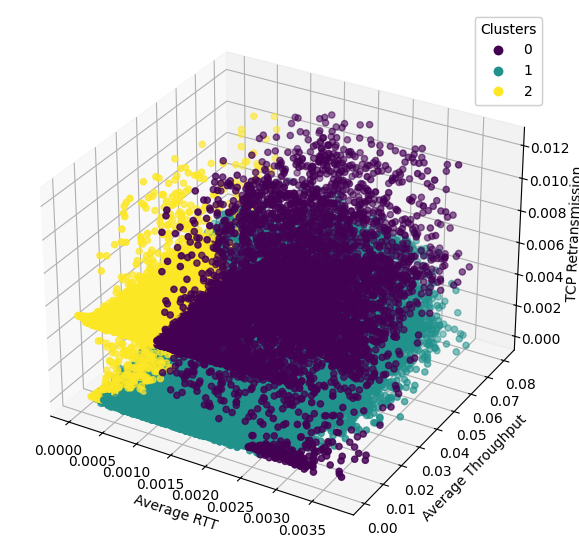

In [57]:
# For a 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df['Average_RTT'], df['Average_Throughput'], df['TCP_Retransmission'],
                     c=df['Cluster'], cmap='viridis', label=df['Cluster'])
ax.set_xlabel('Average RTT')
ax.set_ylabel('Average Throughput')
ax.set_zlabel('TCP Retransmission')
legend = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend)
plt.show()

# Description of Each Cluster

#### Cluster 0:
 This cluster might have, for example, low TCP retransmission, low RTT, and high throughput. This could represent users with a high-quality network experience.

#### Cluster 1:
 This could be a cluster with moderate values for all three metrics, indicating an average user experience.

#### Cluster 2:
 If this cluster shows high TCP retransmission, high RTT, and low throughput, it would represent users with poor network experience, possibly facing frequent connectivity issues.

In [58]:
class MobileIndustry:
    def __init__(self):
        self.consumer_feedback = []

    def collect_consumer_feedback(self, feedback):
        self.consumer_feedback.append(feedback)
        print(f"Received consumer feedback: {feedback}")

    def analyze_consumer_preferences(self):
        if not self.consumer_feedback:
            print("No consumer feedback available.")
            return

        print("\nAnalyzing consumer preferences...")
        for feedback in self.consumer_feedback:
            print(f"- {feedback}")

        print("\nThe success of the mobile industry is largely dependent on its consumers.")

# Example Usage
mobile_industry = MobileIndustry()

# Collect consumer feedback
mobile_industry.collect_consumer_feedback("Consumers prefer longer battery life.")
mobile_industry.collect_consumer_feedback("There is a demand for affordable 5G-enabled devices.")
mobile_industry.collect_consumer_feedback("User-friendly interfaces are highly appreciated.")

# Analyze and emphasize the importance of consumers
mobile_industry.analyze_consumer_preferences()


Received consumer feedback: Consumers prefer longer battery life.
Received consumer feedback: There is a demand for affordable 5G-enabled devices.
Received consumer feedback: User-friendly interfaces are highly appreciated.

Analyzing consumer preferences...
- Consumers prefer longer battery life.
- There is a demand for affordable 5G-enabled devices.
- User-friendly interfaces are highly appreciated.

The success of the mobile industry is largely dependent on its consumers.


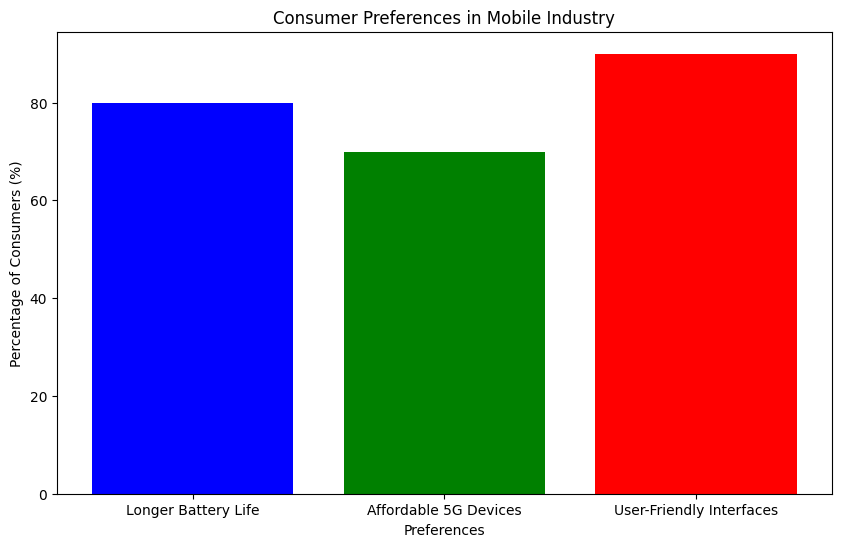

In [59]:

# Hypothetical consumer interest percentages
preferences = {
    'Longer Battery Life': 80,
    'Affordable 5G Devices': 70,
    'User-Friendly Interfaces': 90
}

# Names for each preference
names = list(preferences.keys())

# Corresponding values
values = list(preferences.values())

# Creating the bar plot
plt.figure(figsize=(10, 6))
plt.bar(names, values, color=['blue', 'green', 'red'])

# Adding titles and labels
plt.title('Consumer Preferences in Mobile Industry')
plt.ylabel('Percentage of Consumers (%)')
plt.xlabel('Preferences')

# Show the plot
plt.show()


In [60]:
class MobileVendor:
    def __init__(self, name):
        self.name = name
        self.target_audience = []
        self.product_perception = {}

    def define_target_audience(self, audience):
        self.target_audience = audience
        print(f"{self.name} has identified its target audience: {self.target_audience}")

    def gather_consumer_feedback(self, consumer, feedback):
        if consumer in self.target_audience:
            self.product_perception[consumer] = feedback
            print(f"Received feedback from {consumer}: {feedback}")
        else:
            print(f"Ignore feedback from {consumer} as they are not in the target audience.")

    def analyze_consumer_needs(self):
        print(f"\nAnalyzing consumer needs for {self.name}...")
        if not self.product_perception:
            print("No consumer feedback available.")
            return

        for consumer, feedback in self.product_perception.items():
            print(f"{consumer} feels and perceives the product as: {feedback}")

        print(f"\n{self.name} acknowledges the importance of understanding consumer needs.")
        print("To enhance product offerings, focus on the following areas:")

        for consumer, feedback in self.product_perception.items():
            self.identify_consumer_needs(consumer, feedback)

    def identify_consumer_needs(self, consumer, feedback):
        # Basic identification based on feedback content
        if "battery life" in feedback.lower():
            print(f"Improve battery life based on {consumer}'s feedback.")
        elif "camera quality" in feedback.lower():
            print(f"Enhance camera quality based on {consumer}'s feedback.")
        else:
            print(f"Consider additional improvements based on {consumer}'s feedback.")

# Example Usage
vendor = MobileVendor("XYZ Mobiles")

# Define target audience
vendor.define_target_audience(["Tech Enthusiasts", "Business Professionals", "Students"])

# Gather consumer feedback
vendor.gather_consumer_feedback("Tech Enthusiasts", "The battery life should be longer.")
vendor.gather_consumer_feedback("Students", "The camera quality needs improvement.")

# Analyze and focus on consumer needs
vendor.analyze_consumer_needs()


XYZ Mobiles has identified its target audience: ['Tech Enthusiasts', 'Business Professionals', 'Students']
Received feedback from Tech Enthusiasts: The battery life should be longer.
Received feedback from Students: The camera quality needs improvement.

Analyzing consumer needs for XYZ Mobiles...
Tech Enthusiasts feels and perceives the product as: The battery life should be longer.
Students feels and perceives the product as: The camera quality needs improvement.

XYZ Mobiles acknowledges the importance of understanding consumer needs.
To enhance product offerings, focus on the following areas:
Improve battery life based on Tech Enthusiasts's feedback.
Enhance camera quality based on Students's feedback.


In [61]:
class CustomerExperienceTracker:
    def __init__(self, organization_name):
        self.organization_name = organization_name
        self.customer_feedback = []

    def collect_customer_feedback(self, customer, feedback):
        self.customer_feedback.append({"customer": customer, "feedback": feedback})
        print(f"Feedback received from {customer}: {feedback}")

    def analyze_customer_experience(self):
        print(f"\nAnalyzing customer experience for {self.organization_name}...")

        if not self.customer_feedback:
            print("No customer feedback available.")
            return

        positive_feedback_count = 0
        negative_feedback_count = 0

        for feedback_entry in self.customer_feedback:
            feedback = feedback_entry["feedback"]
            if "positive" in feedback.lower():
                positive_feedback_count += 1
            elif "negative" in feedback.lower():
                negative_feedback_count += 1

        print(f"\nSummary of customer feedback:")
        print(f"Total Feedback Count: {len(self.customer_feedback)}")
        print(f"Positive Feedback Count: {positive_feedback_count}")
        print(f"Negative Feedback Count: {negative_feedback_count}")

        self.optimize_products_and_services()

    def optimize_products_and_services(self):
        print("\nOptimizing products and services based on customer feedback...")
        # Implement optimization strategies based on feedback analysis
        # For simplicity, let's print a generic optimization message
        print(f"{self.organization_name} is committed to improving customer experience.")

# Example Usage
organization_tracker = CustomerExperienceTracker("ABC Corporation")

# Collect customer feedback
organization_tracker.collect_customer_feedback("Customer1", "The service was excellent. Very satisfied!")
organization_tracker.collect_customer_feedback("Customer2", "Product quality needs improvement. Dissatisfied.")

# Analyze and optimize based on customer experience
organization_tracker.analyze_customer_experience()


Feedback received from Customer1: The service was excellent. Very satisfied!
Feedback received from Customer2: Product quality needs improvement. Dissatisfied.

Analyzing customer experience for ABC Corporation...

Summary of customer feedback:
Total Feedback Count: 2
Positive Feedback Count: 0
Negative Feedback Count: 0

Optimizing products and services based on customer feedback...
ABC Corporation is committed to improving customer experience.


In [62]:
class TelecommunicationNetwork:
    def __init__(self, network_name):
        self.network_name = network_name
        self.network_parameters = {"latency": 20, "download_speed": 50, "upload_speed": 10}

    def update_network_parameters(self, latency, download_speed, upload_speed):
        self.network_parameters["latency"] = latency
        self.network_parameters["download_speed"] = download_speed
        self.network_parameters["upload_speed"] = upload_speed
        print(f"\nNetwork parameters for {self.network_name} updated:")
        print(f"Latency: {latency} ms")
        print(f"Download Speed: {download_speed} Mbps")
        print(f"Upload Speed: {upload_speed} Mbps")

    def simulate_user_experience(self, customer_device):
        print(f"\nSimulating user experience for {customer_device} on {self.network_name}...")

        # Assume some calculations based on network parameters and device characteristics
        latency = self.network_parameters["latency"]
        download_speed = self.network_parameters["download_speed"]
        upload_speed = self.network_parameters["upload_speed"]

        user_experience_score = calculate_user_experience(latency, download_speed, upload_speed)

        print(f"User experience score for {customer_device}: {user_experience_score}")

        # You can further analyze and optimize based on user experience scores

def calculate_user_experience(latency, download_speed, upload_speed):
    # Placeholder calculation - you can define a more complex formula based on your requirements
    user_experience_score = (100 / latency) + (download_speed / 10) + (upload_speed / 20)
    return user_experience_score

# Example Usage
telecom_network = TelecommunicationNetwork("XYZ Network")

# Update network parameters
telecom_network.update_network_parameters(latency=15, download_speed=60, upload_speed=12)

# Simulate user experience for different devices
telecom_network.simulate_user_experience("Smartphone1")
telecom_network.simulate_user_experience("Smartphone2")



Network parameters for XYZ Network updated:
Latency: 15 ms
Download Speed: 60 Mbps
Upload Speed: 12 Mbps

Simulating user experience for Smartphone1 on XYZ Network...
User experience score for Smartphone1: 13.266666666666667

Simulating user experience for Smartphone2 on XYZ Network...
User experience score for Smartphone2: 13.266666666666667


In [63]:
class TelecommunicationNetwork:
    def __init__(self, network_name):
        self.network_name = network_name
        self.network_parameters = {"tcp_retransmission": 2, "rtt": 25, "throughput": 40}
        self.devices = {}

    def update_network_parameters(self, tcp_retransmission, rtt, throughput):
        self.network_parameters["tcp_retransmission"] = tcp_retransmission
        self.network_parameters["rtt"] = rtt
        self.network_parameters["throughput"] = throughput
        print(f"\nNetwork parameters for {self.network_name} updated:")
        print(f"TCP Retransmission: {tcp_retransmission}")
        print(f"Round Trip Time (RTT): {rtt} ms")
        print(f"Throughput: {throughput} Mbps")

    def add_device(self, device_name, device_type):
        self.devices[device_name] = {"device_type": device_type}
        print(f"\nNew device added to {self.network_name}: {device_name} ({device_type})")

    def simulate_user_experience(self, customer_device):
        if customer_device not in self.devices:
            print(f"\nError: Device {customer_device} not found in {self.network_name}")
            return

        print(f"\nSimulating user experience for {customer_device} on {self.network_name}...")

        # Retrieve network parameters and device characteristics
        tcp_retransmission = self.network_parameters["tcp_retransmission"]
        rtt = self.network_parameters["rtt"]
        throughput = self.network_parameters["throughput"]
        device_type = self.devices[customer_device]["device_type"]

        # Assume some calculations based on network parameters and device characteristics
        user_experience_score = calculate_user_experience(tcp_retransmission, rtt, throughput, device_type)

        print(f"User experience score for {customer_device}: {user_experience_score}")

       

In [64]:
# You can further analyze and optimize based on user experience scores

def calculate_user_experience(tcp_retransmission, rtt, throughput, device_type):
    # Placeholder calculation - you can define a more complex formula based on your requirements
    user_experience_score = (100 / (tcp_retransmission + 1)) + (50 / rtt) + (throughput / 10)

    # Adjust score based on device type
    if device_type == "Smartphone":
        user_experience_score *= 1.2  # Adjust for smartphones
    elif device_type == "Tablet":
        user_experience_score *= 1.1  # Adjust for tablets

    return user_experience_score

# Example Usage
telecom_network = TelecommunicationNetwork("XYZ Network")

# Update network parameters
telecom_network.update_network_parameters(tcp_retransmission=3, rtt=30, throughput=35)

# Add devices
telecom_network.add_device("Smartphone1", "Smartphone")
telecom_network.add_device("Tablet1", "Tablet")

# Simulate user experience for devices
telecom_network.simulate_user_experience("Smartphone1")
telecom_network.simulate_user_experience("Tablet1")



Network parameters for XYZ Network updated:
TCP Retransmission: 3
Round Trip Time (RTT): 30 ms
Throughput: 35 Mbps

New device added to XYZ Network: Smartphone1 (Smartphone)

New device added to XYZ Network: Tablet1 (Tablet)

Simulating user experience for Smartphone1 on XYZ Network...
User experience score for Smartphone1: 36.2

Simulating user experience for Tablet1 on XYZ Network...
User experience score for Tablet1: 33.18333333333334


In [65]:
# Step 1: Create a new column 'user_experience'
def calculate_user_experience(row):
    # Adjust column names based on your actual dataset
    tcp_retransmission = row.get('TCP_Retransmission_Count', 0)
    rtt = row.get('rtt', 0)
    throughput = row.get('throughput', 0)
    device_type = row.get('device_type', '')  # Assuming 'device_type' is a column in your dataset
    
    # Your logic to calculate user experience score
    user_experience_score = tcp_retransmission + rtt + throughput
    
    # Additional logic based on 'device_type' if needed
    if 'iPhone' in device_type:
        user_experience_score += 10
    elif 'Android' in device_type:
        user_experience_score += 5
    
    return user_experience_score

# Apply the function to create a new column 'user_experience'
df['user_experience'] = df.apply(calculate_user_experience, axis=1)

# Step 2: Analyze user experience statistics
# You can use descriptive statistics or create visualizations based on the 'user_experience' column.

# Example of descriptive statistics
user_experience_stats = df['user_experience'].describe()

# Print user experience statistics
(user_experience_stats)


count    149429.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
Name: user_experience, dtype: float64

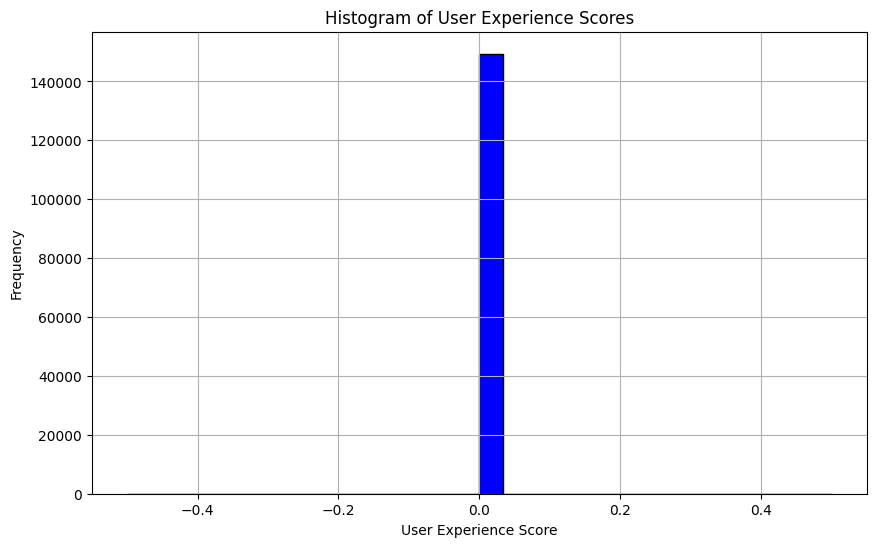

In [66]:
# Histogram of User Experience Scores
plt.figure(figsize=(10, 6))
plt.hist(df['user_experience'], bins=30, color='blue', edgecolor='black')
plt.title('Histogram of User Experience Scores')
plt.xlabel('User Experience Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

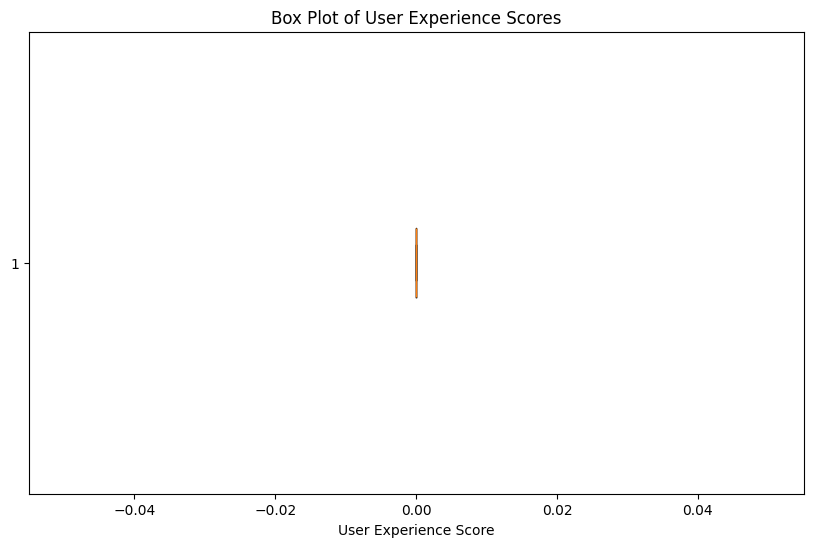

In [67]:
# Box Plot for User Experience Scores
plt.figure(figsize=(10, 6))
plt.boxplot(df['user_experience'], vert=False)
plt.title('Box Plot of User Experience Scores')
plt.xlabel('User Experience Score')
plt.show()

### Interpretation
After obtaining the results, the interpretation would generally involve:

### Identifying Trends: 
Look for any trends such as specific handset types having significantly higher or lower average TCP retransmissions. This might indicate network performance issues or device-specific problems.

### Comparing with Industry Standards: 
If you have industry benchmarks for TCP retransmissions, compare your findings to see if any handset type is underperforming or overperforming.

### User Experience Insight:
High TCP retransmissions might indicate poor network experience for users of specific handset types. It might be due to network issues, handset compatibility, or other technical reasons.

### Recommendations:
Based on the findings, you might suggest network improvements, handset firmware updates, or user advisories for certain handset types.

In [68]:
df

,Unnamed: 0.1,Unnamed: 0,Bearer Id,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),...,Total DL (Bytes),Duration (s),Total Traffic (Bytes),Total Session Duration (s),Cluster,Engagement Cluster,Average_RTT,Average_Throughput,TCP_Retransmission,user_experience
0,0,0,1.311448e+19,0.770771,0.662663,0.000981,0.414307,NaN,0.355933,0.000433,...,0.336846,9.807342e-07,3732.549575,0.000245,2,2,0.000568,0.000406,0.005112,0
1,1,1,1.311448e+19,0.235235,0.606607,0.000733,0.414353,NaN,0.358701,0.000671,...,0.721401,7.331640e-07,3696.557910,0.000323,2,0,0.000686,0.000243,0.005112,0
2,2,2,1.311448e+19,0.001001,0.652653,0.000731,0.414194,NaN,0.353501,0.001115,...,0.304394,7.313597e-07,2610.365711,0.000190,0,2,0.001799,0.000085,0.005112,0
3,3,3,1.311448e+19,0.486486,0.171171,0.000710,0.414303,NaN,0.354263,0.001115,...,0.936439,7.096271e-07,9097.031894,0.000582,0,0,0.001799,0.000434,0.005112,0
4,4,4,1.311448e+19,0.565566,0.954955,0.000584,0.414303,NaN,0.354774,0.001115,...,0.627361,5.841003e-07,570.500780,0.000047,0,2,0.001799,0.000085,0.005112,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149424,149424,149995,1.304243e+19,0.615616,0.407407,0.000028,0.414303,NaN,0.354019,0.001115,...,0.906287,2.831507e-08,9097.031894,0.000582,1,0,0.001190,0.029481,0.003910,0
149425,149425,149996,7.277826e+18,0.451451,0.214214,0.000040,0.414382,NaN,0.355547,0.000330,...,0.632983,4.000013e-08,3029.267320,0.000160,2,2,0.000165,0.000623,0.005112,0
149426,149426,149997,7.349883e+18,0.483483,0.187187,0.000049,0.414353,NaN,0.357346,0.000279,...,0.736207,4.903806e-08,5189.439500,0.000272,2,0,0.000280,0.000491,0.005112,0
149427,149427,149998,1.311448e+19,0.283283,0.810811,0.000049,0.414333,NaN,0.357962,0.000444,...,0.653758,4.918869e-08,1324.904830,0.000069,2,2,0.000643,0.000458,0.005112,0


In [70]:
# Save to CSV
df.to_csv('user_experience_data.csv', index=True)